### import thư viện

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import kaleido

### Đọc dữ liệu

In [43]:
path = r'D:\Research_ICNlab\Clustering\Data\Country-data.csv'

In [44]:
data = pd.read_csv(path)
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
print(len(data.columns))

10


### EDA

In [46]:
df = data.copy()

In [47]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

| **Biến**      | **Mô tả**                                                                                                                                                    |
|---------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `country`     | Tên quốc gia                                                                                                                                                 |
| `child_mort`  | Tỷ lệ tử vong của trẻ em dưới 5 tuổi trên 1000 ca sinh sống                                                                                                   |
| `exports`     | Xuất khẩu hàng hóa và dịch vụ bình quân đầu người. Được tính theo % GDP bình quân đầu người                                                                   |
| `health`      | Tổng chi tiêu cho y tế bình quân đầu người. Được tính theo % GDP bình quân đầu người                                                                          |
| `imports`     | Nhập khẩu hàng hóa và dịch vụ bình quân đầu người. Được tính theo % GDP bình quân đầu người                                                                   |
| `Income`      | Thu nhập ròng bình quân đầu người                                                                                                                             |
| `Inflation`   | Đo lường tốc độ tăng trưởng hàng năm của Tổng GDP                                                                                                             |
| `life_expec`  | Số năm trung bình mà một đứa trẻ mới sinh có thể sống nếu các mô hình tử vong hiện tại được loại bỏ                                                          |
| `total_fer`   | Số trẻ em mà mỗi phụ nữ có thể sinh ra nếu tỷ lệ sinh theo độ tuổi hiện tại vẫn th...                                                                         |
| `gdpp`        | GDP bình quân đầu người. Được tính bằng Tổng GDP chia cho tổng dân số                                                                                         |


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [49]:
df.duplicated().sum()

0

In [50]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [51]:
df.shape

(167, 10)

### Feature Engineering

In [52]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [53]:
df['country'] = df['country'].astype('category')

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2540092128.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = features[i], palette = 'Blues', ax=ax_i,kde = True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2540092128.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = features[i], palette = 'Blues', ax=ax_i,kde = True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2540092128.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = features[i], palette = 'Blues', ax=ax_i,kde = True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2540092128.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = features[i], palette = 'Blues', ax=ax_i,kde = True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2540092128.py:9: UserWarning: Ignoring `palett

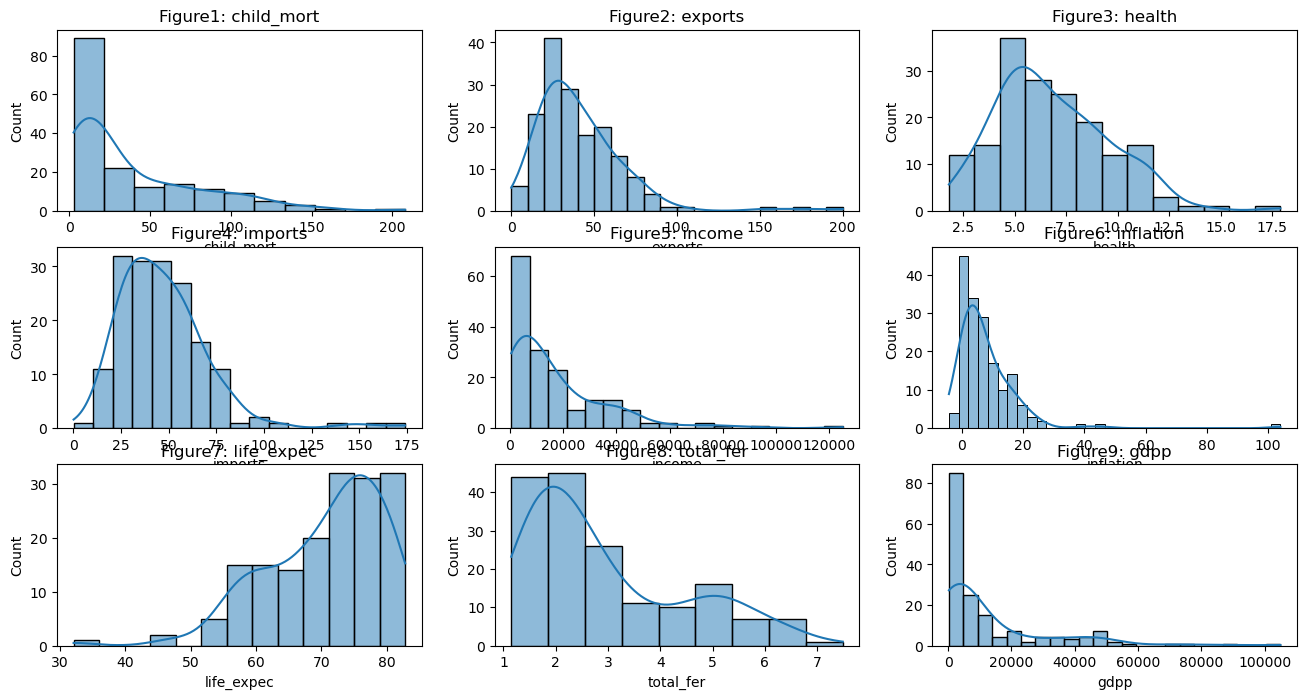

In [54]:
nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols, figsize = (16,8))
for r in range(nrows) :
    for c in range(ncols) :
        i = r*nrows + c
        if i < len(features) :
            ax_i = ax[r,c]
            sns.histplot(data = df, x = features[i], palette = 'Blues', ax=ax_i,kde = True)
            ax_i.set_title(f"Figure{i + 1}: {features[i]}")
plt.show()

### Features of Economically Backward Countries:

- Thu nhập bình quân đầu người của quốc gia rất thấp.
- Dân số cao dẫn đến không có sẵn nguồn lực.
- Thất nghiệp do ít nguồn lực.
- Của cải của quốc gia thấp dẫn đến vốn thấp.
- Phân phối của cải và thu nhập không công bằng.
- Thiếu các tiện nghi giáo dục phù hợp và do đó tình trạng mù chữ vẫn phổ biến.
- Mức sống thấp.
- Không có tiến bộ kỹ thuật.
- Dịch vụ y tế kém cùng với tỷ lệ sinh và tử cao.


In [55]:
df['child_mort']

0       90.2
1       16.6
2       27.3
3      119.0
4       10.3
       ...  
162     29.2
163     17.1
164     23.3
165     56.3
166     83.1
Name: child_mort, Length: 167, dtype: float64

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\423295604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\423295604.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\423295604.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

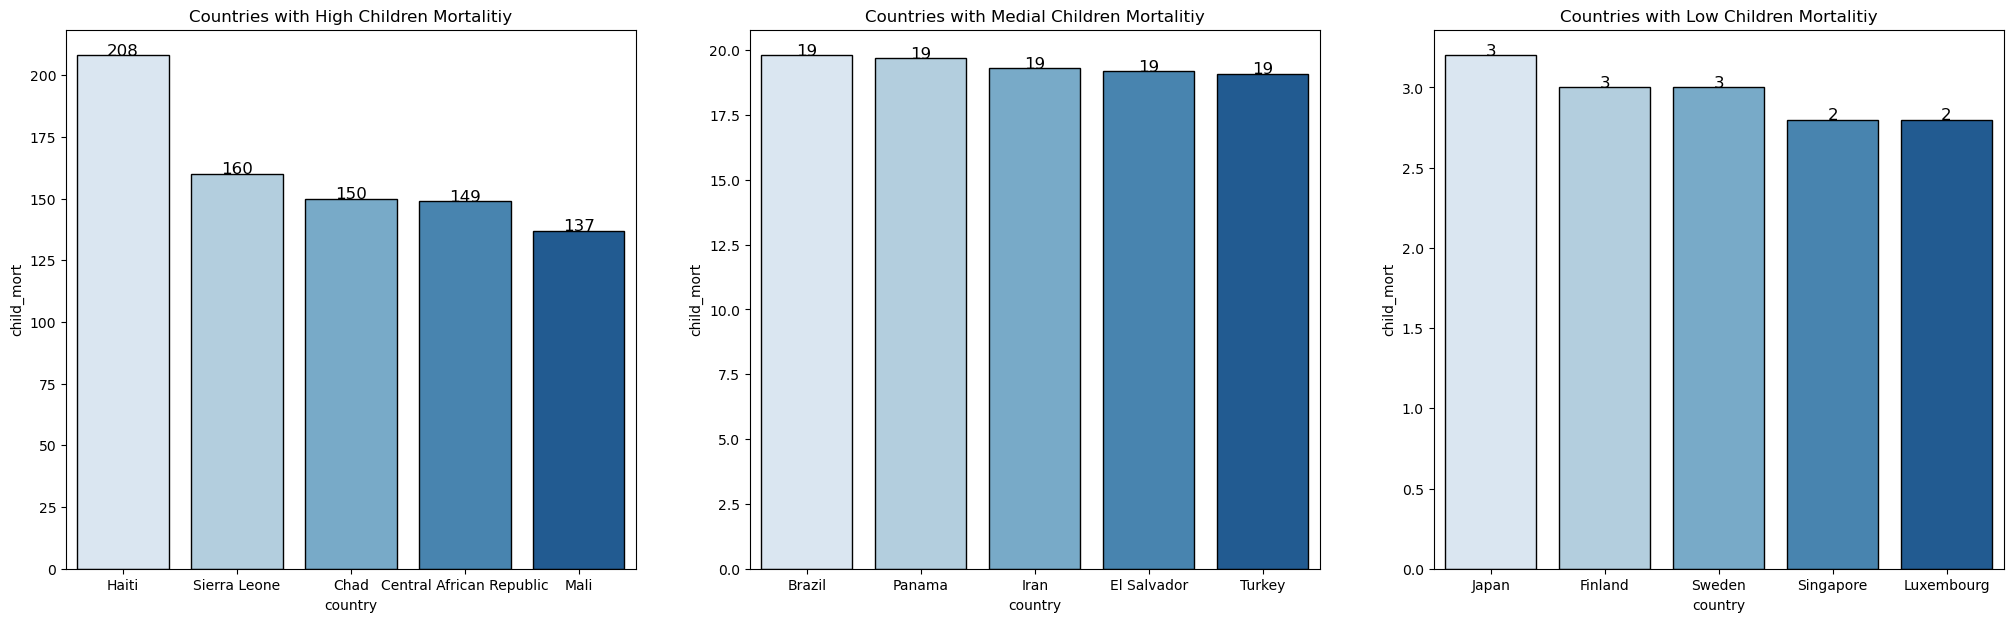

In [56]:
#child_mort : Economically backward nations have a high infant mortality rate!
colors = 'Blues'
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Haiti có tỉ lệ tử vong ở trẻ cao nhất, các quốc gia ở CP chiếm tỷ lệ lớn
- Các quốc gia ở châu Á và Châu Âu chiếm tỷ lệ tử vong ở trẻ thấp

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\1123942914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'exports').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\1123942914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'exports').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\1123942914.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'exports').iloc[1

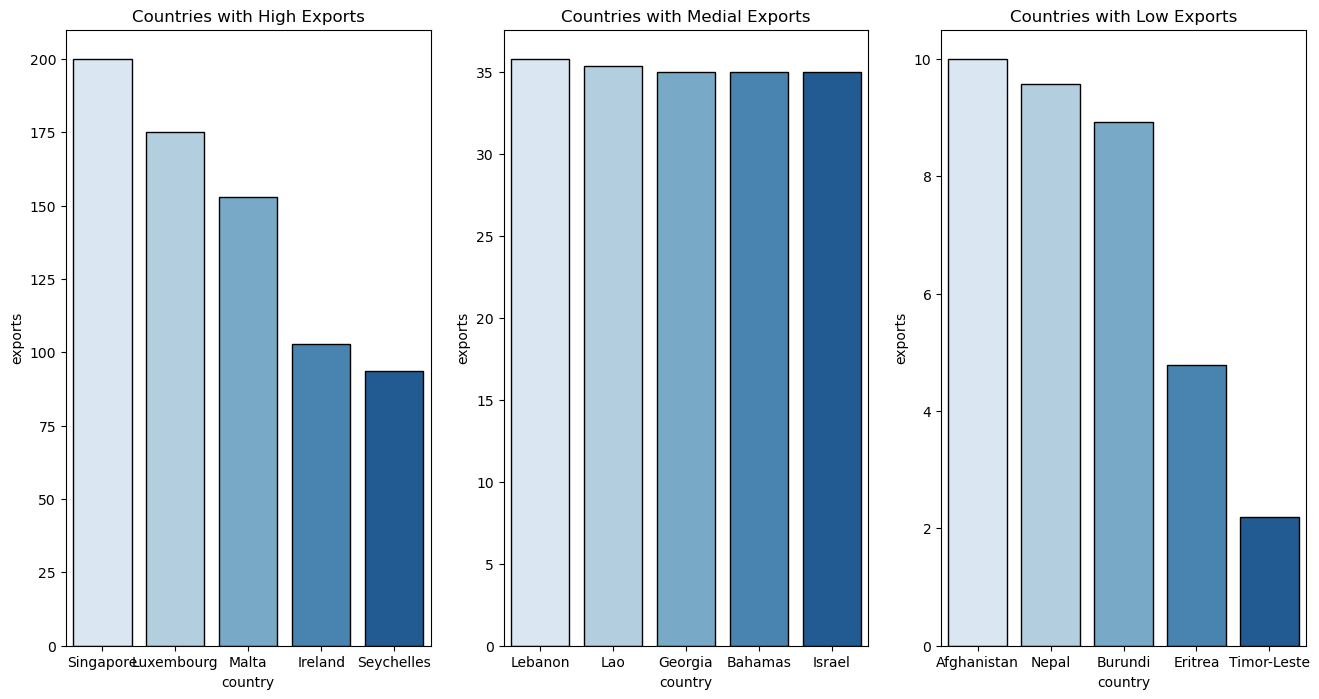

In [57]:
#exports: Đây là yếu tố rất quan trọng để xây dựng nền kinh tế quốc gia.Xuất khẩu hàng hóa và dịch vụ bình quân đầu người.
fig = plt.subplots(1,3,figsize = (16,8))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'exports').iloc[:5],
            x = 'country', y = 'exports', palette=colors, edgecolor = 'black');
plt.title('Countries with High Exports')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'exports').iloc[81:86],
            x = 'country', y = 'exports', palette=colors,edgecolor = 'black')
plt.title('Countries with Medial Exports')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'exports').iloc[161:166],
            x = 'country', y = 'exports', palette=colors,edgecolor = 'black')
plt.title('Countries with Low Exports')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Singapore có tỷ lệ xuất khẩu hàng hóa cao nhất
- Afghanistan và Nepal hiện diện ở mức xuất khẩu thấp. Vị trí địa lý của các quốc gia này có ảnh hưởng lớn. Các quốc gia có lượng xuất khẩu thấp cũng có diện tích địa lý nhỏ.

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\3922348667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'health').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\3922348667.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'health').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\3922348667.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'health').iloc[161:

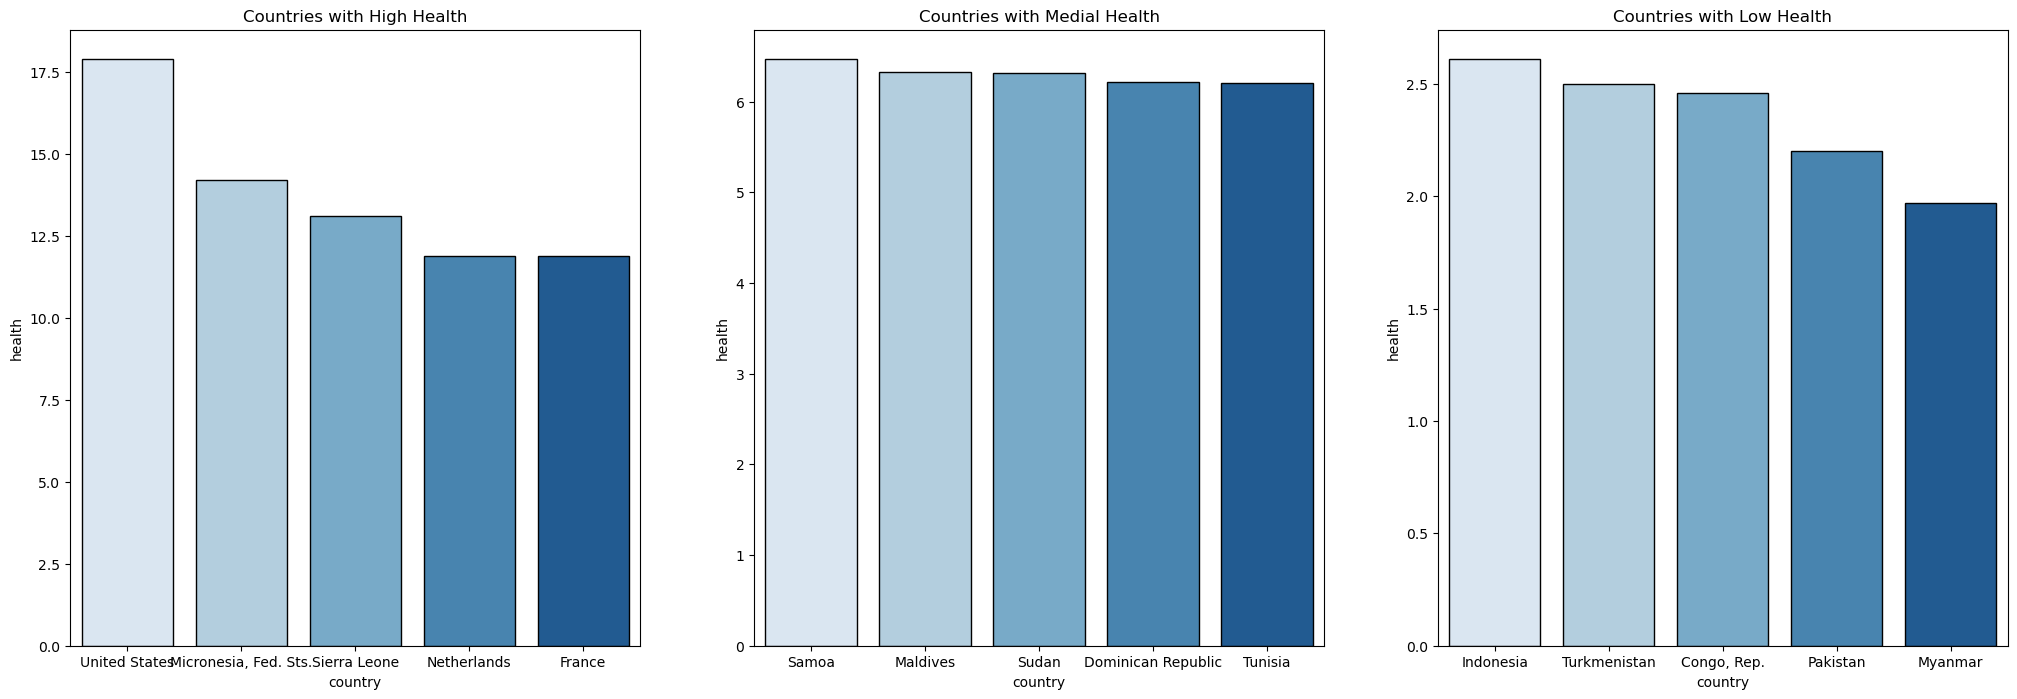

In [58]:
#Health: Tổng chi tiêu cho y tế bình quân đầu người. Được tính theo % GDP bình quân đầu người.
fig = plt.subplots(1,3,figsize = (25,8))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'health').iloc[:5],
            x = 'country', y = 'health', palette=colors, edgecolor = 'black');
plt.title('Countries with High Health')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'health').iloc[81:86],
            x = 'country', y = 'health', palette=colors,edgecolor = 'black')
plt.title('Countries with Medial Health')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'health').iloc[161:166],
            x = 'country', y = 'health', palette=colors,edgecolor = 'black')
plt.title('Countries with Low Health')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- USA có tỷ lệ chi tiêu cho y tế cao nhất với hơn 17% GDP bình quân 
- Các nước châu Á chiếm ưu thế ở nhóm thấp về sức khỏe với tỷ lệ dưới 3%.


C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\921092937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'imports').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\921092937.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'imports').iloc[81:86],x = 'country',
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\921092937.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'impor

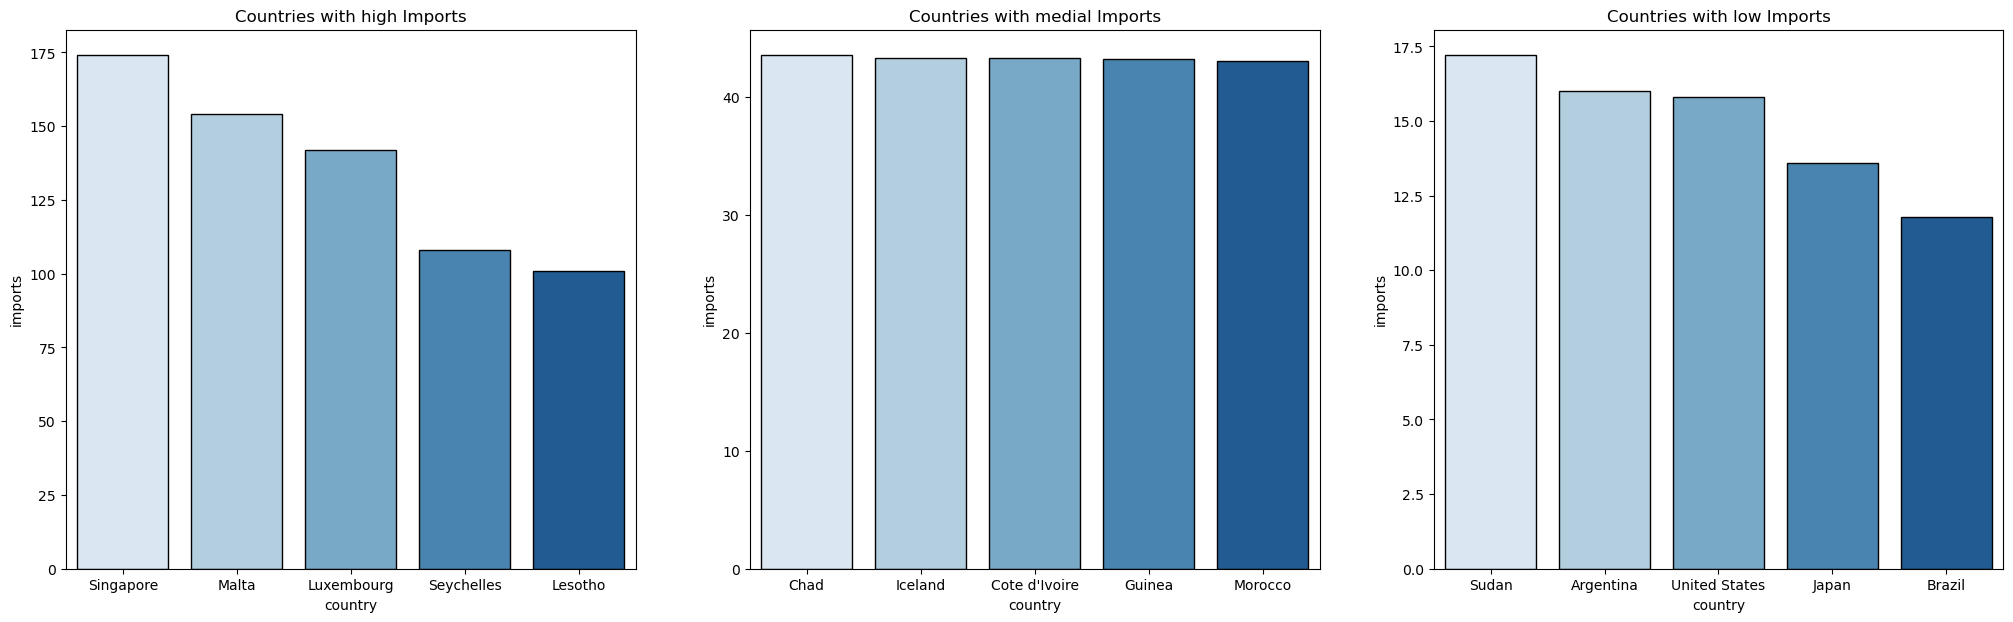

In [59]:
#imports: Nhập khẩu hàng hóa và dịch vụ bình quân đầu người. Được tính theo % GDP bình quân đầu
fig = plt.subplots(1,3,figsize = (25,7))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'imports').iloc[:5],
            x = 'country', y = 'imports', palette=colors, edgecolor = 'black');
plt.title('Countries with high Imports')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'imports').iloc[81:86],x = 'country',
            y = 'imports', palette = colors, edgecolor = 'black')
plt.title('Countries with medial Imports')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'imports').iloc[161:166],x = 'country',
            y = 'imports', palette = colors, edgecolor = 'black')
plt.title('Countries with low Imports')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)


- Singapore, Malta, Luxembourg, Seychelles và Lesotho là 5 nước có tỷ lệ xuất, nhập khẩu hàng hóa và dịch vụ cao nhất.
- Brazil là quốc gia có tỷ kệ xuất nhâpj khẩu hàng hóa thấp nhât với hơn 11%

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\801934730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'income').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\801934730.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'income').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\801934730.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'income').iloc[161:166

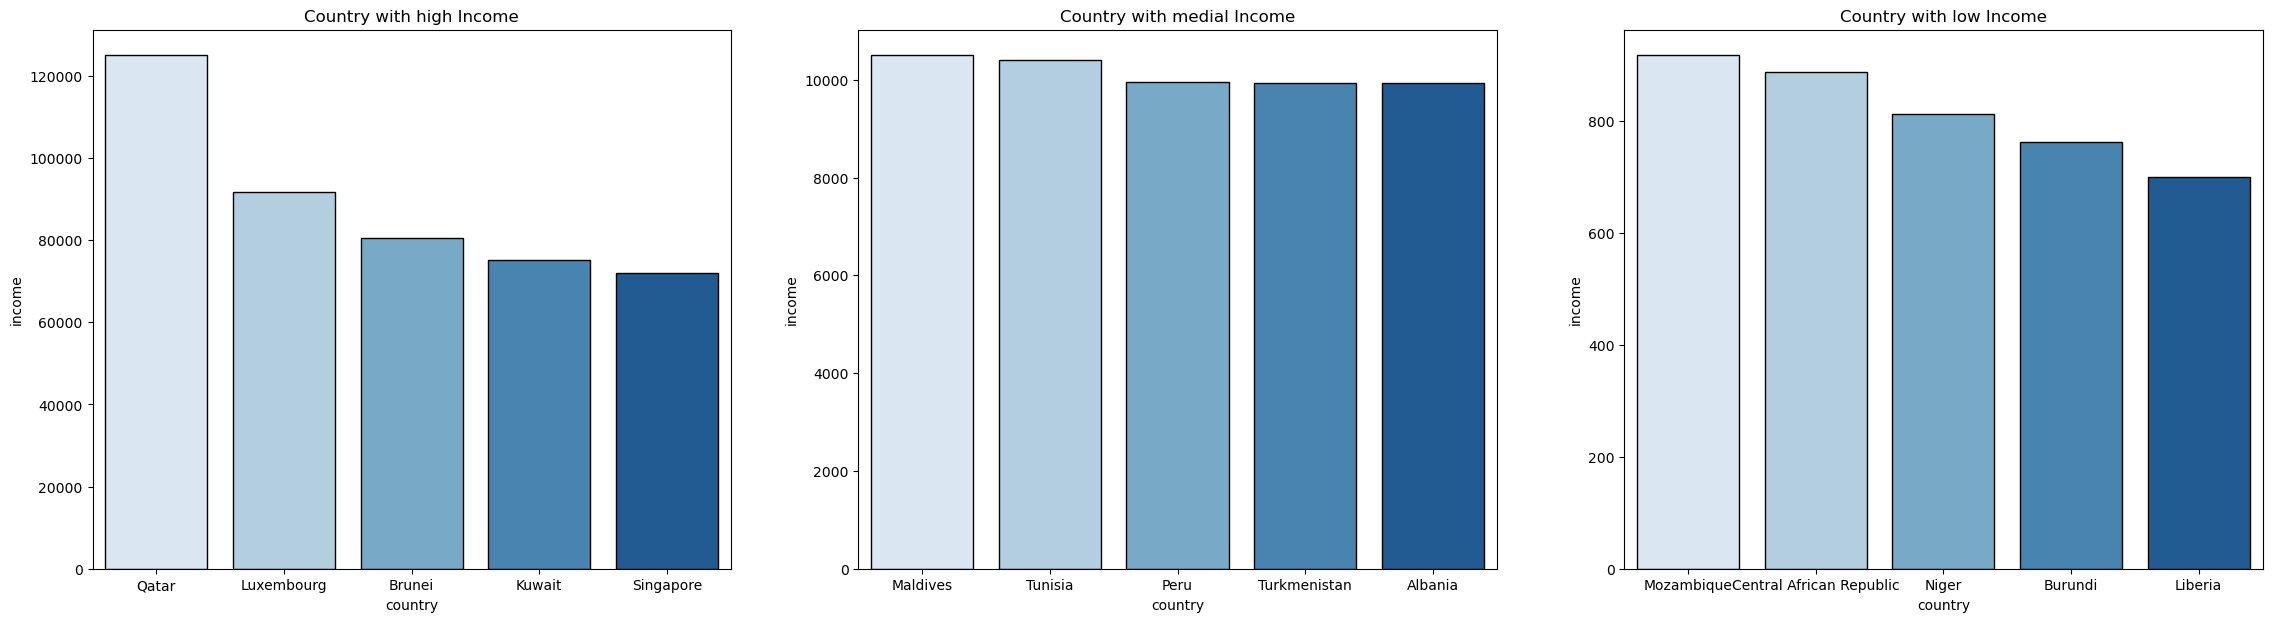

In [60]:
# `Income`: Thu nhập ròng bình quân đầu người cũng đóng vai trò quan trọng trong phát triền kte
fig = plt.subplots(1,3,figsize = (28,7))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'income').iloc[:5],
            x = 'country', y = 'income', palette = colors, edgecolor = 'black')
plt.title('Country with high Income')
for rect in ax.patches: 
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'income').iloc[81:86],
            x = 'country', y= 'income', palette = colors, edgecolor = 'black')
plt.title('Country with medial Income')
for rect in ax.patches :
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'income').iloc[161:166],
            x = 'country', y= 'income', palette = colors, edgecolor = 'black')
plt.title('Country with low Income')
for rect in ax.patches :
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

- Quatar là nước đứng đầu bình quân thu nhập trên thế giới với hơn 120k$
- Thu nhập thấp chủ yếu là các quốc gia châu Phi. Điều này bị ảnh hưởng bởi thiệt hại do quá trình thực dân hóa gây ra mà các quốc gia này vẫn chưa phục hồi.

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\4116031976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'inflation').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\4116031976.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'inflation').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\4116031976.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'inflation').

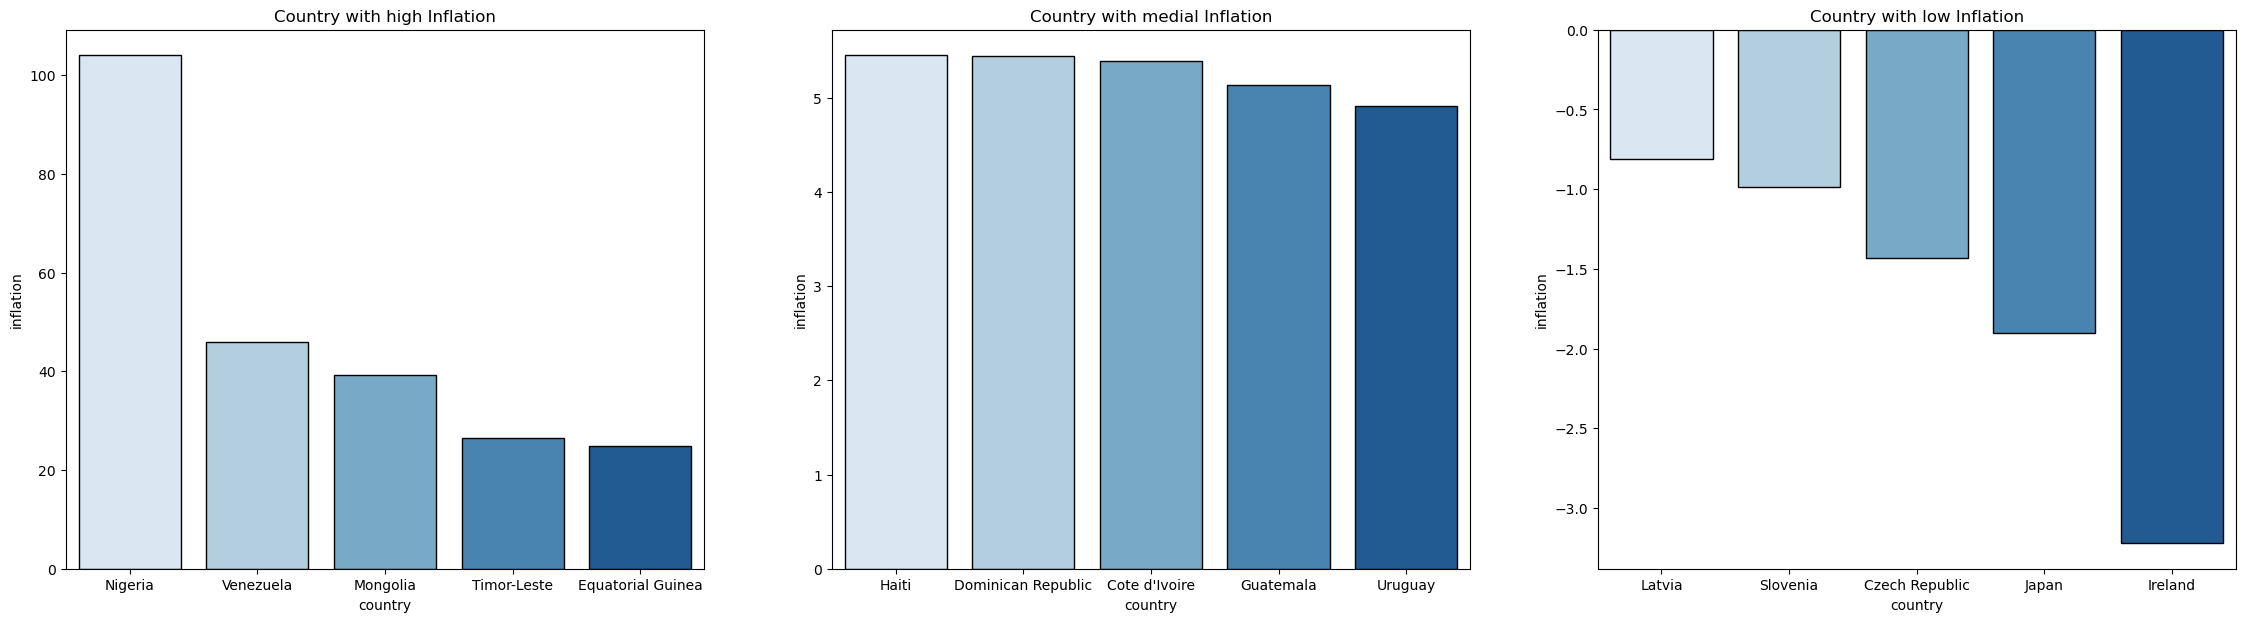

In [61]:
#`Inflation` Đo lường tốc độ lạm phát hàng năm của Tổng GDP 
fig = plt.subplots(1,3,figsize = (28,7))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'inflation').iloc[:5],
            x = 'country', y = 'inflation', palette = colors, edgecolor = 'black')
plt.title('Country with high Inflation')
for rect in ax.patches: 
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'inflation').iloc[81:86],
            x = 'country', y= 'inflation', palette = colors, edgecolor = 'black')
plt.title('Country with medial Inflation')
for rect in ax.patches :
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'inflation').iloc[161:166],
            x = 'country', y= 'inflation', palette = colors, edgecolor = 'black')
plt.title('Country with low Inflation')
for rect in ax.patches :
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

- Lạm phát cao hơn làm giảm sức mua của người dân. Các quốc gia có mức lạm phát cao nhất có tình hình kinh tế tàn khốc. Có mức lạm phát cao như vậy là rủi ro đối với sự tồn tại của quốc gia.
- Tương tự như vậy, mức lạm phát có giá trị âm tức là được gọi là giảm phát. Nó báo hiệu nền kinh tế đang trong tình trạng đi xuống dẫn đến suy thoái hoặc thậm chí là khủng hoảng.

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2762127467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'life_expec').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2762127467.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'life_expec').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2762127467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'life_expec'

Text(0.5, 1.0, 'Country with low Life Expectancy')

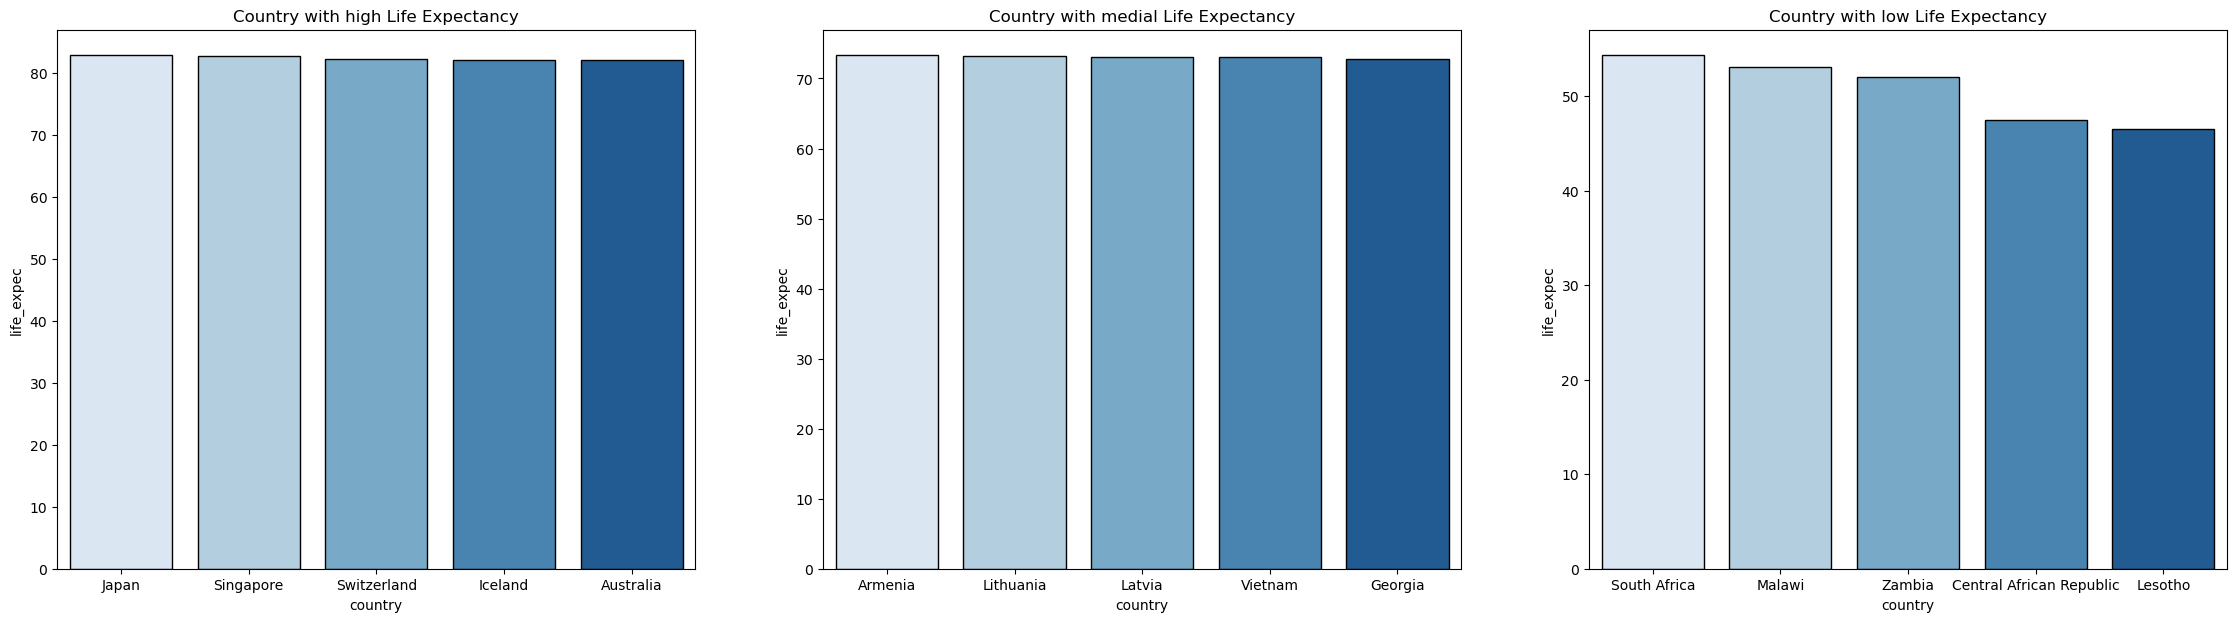

In [62]:
#`life_expec` tuổi thọ trung bình của 1 quốc gia
fig, ax= plt.subplots(1,3,figsize = (28,7))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'life_expec').iloc[:5],
            x = 'country', y = 'life_expec', palette = colors, edgecolor = 'black', ax = ax[0])
plt.title('Country with high Life Expectancy')
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'life_expec').iloc[81:86],
            x = 'country', y = 'life_expec', palette = colors, edgecolor = 'black', ax = ax[1])
plt.title('Country with medial Life Expectancy')
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'life_expec').iloc[161:166],
            x = 'country', y = 'life_expec', palette = colors, edgecolor = 'black', ax = ax[2])
plt.title('Country with low Life Expectancy')


- Japan, Singapore, Switzerland, Iceland, Australia là 5 nước có tuổi thọ trung bình cao nhất trên thế giới với trên 80 tuổi
- Không có quốc gia nào có life_expec cao có mặt trong top 5 về sức khỏe liên quan đến chi tiêu của người dân cho sức khỏe.
- Các quốc gia ở Châu Phi có tuổi thọ trung bình thấp nhất(chưa đến 60 tuổi)
- Nguyên nhân chủ yếu là do các nước châu Phi có trình độ kinh tế kém phát triển, dân số tăng nhanh gây nên những gánh nặng lớn đới với nhiều mặt về kinh tế - xã hội - tài nguyên thiên nhiên và môi trường.

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2999688993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'total_fer').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2999688993.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'total_fer').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\2999688993.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'total_fer').i

Text(0.5, 1.0, 'Country with low Fertility Rate')

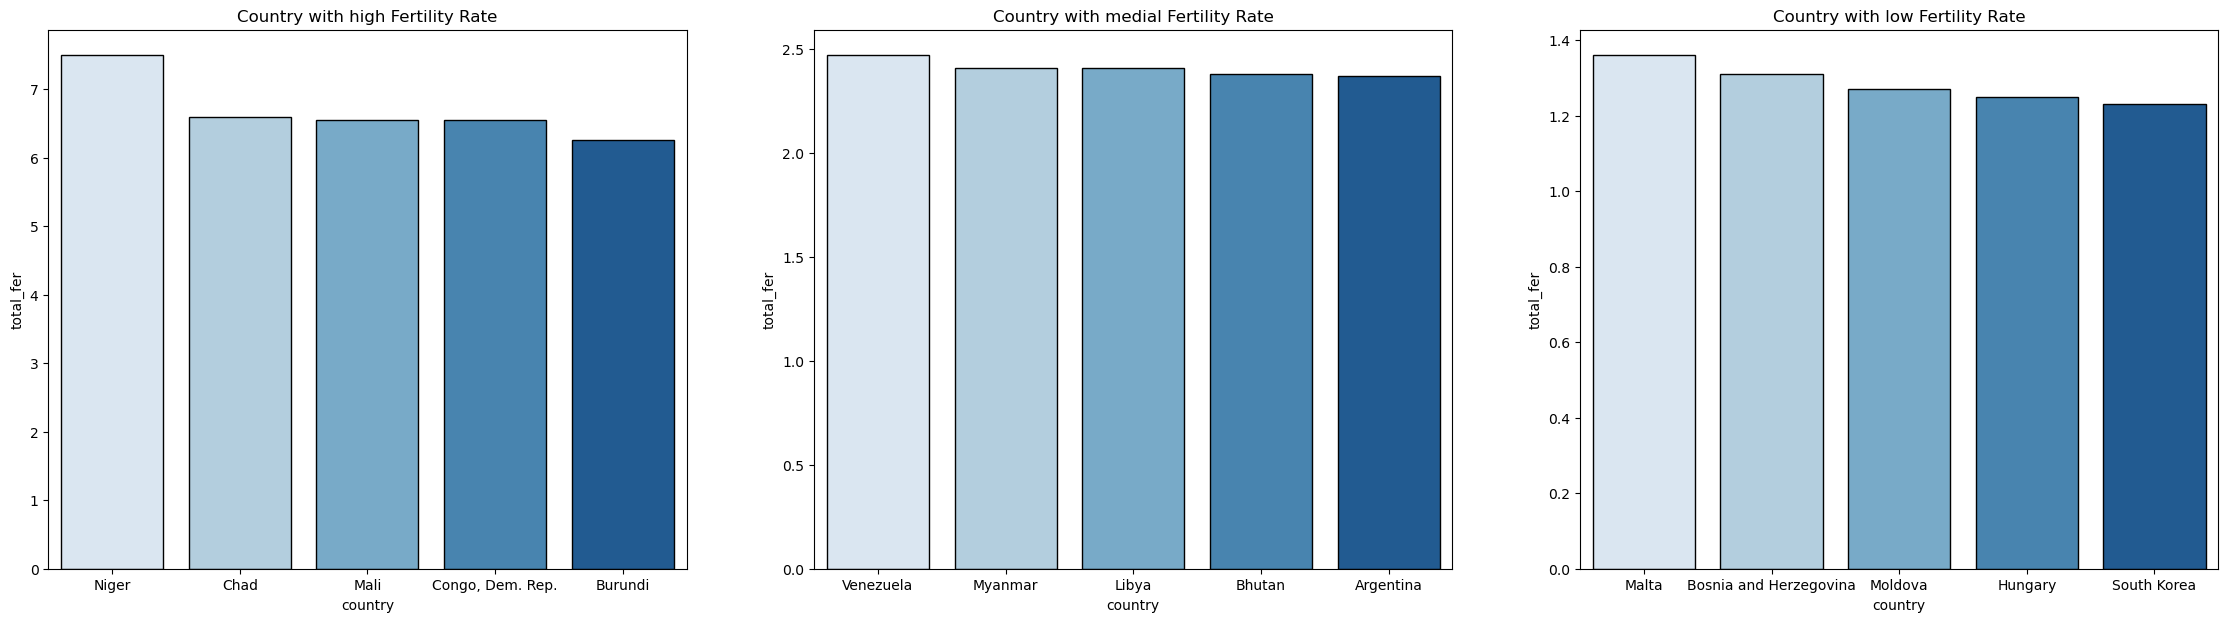

In [63]:
#| `total_fer` tỷ lệ sinh sản của các quốc gia
fig, ax= plt.subplots(1,3,figsize = (28,7))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'total_fer').iloc[:5],
            x = 'country', y = 'total_fer', palette = colors, edgecolor = 'black', ax = ax[0])
plt.title('Country with high Fertility Rate')
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'total_fer').iloc[81:86],
            x = 'country', y = 'total_fer', palette = colors, edgecolor = 'black', ax = ax[1])
plt.title('Country with medial Fertility Rate')
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'total_fer').iloc[161:166],
            x = 'country', y = 'total_fer', palette = colors, edgecolor = 'black', ax = ax[2])
plt.title('Country with low Fertility Rate')

- Các quốc gia châu Phi chiếm ưu thế trong total_fer với các giá trị 6+.
- Giá trị total_fer trung bình là 2 trong khi các giá trị cuối thấp hơn là 1 cũng đáng quan tâm.

C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\541241281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'gdpp').iloc[:5],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\541241281.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'gdpp').iloc[81:86],
C:\Users\nguye\AppData\Local\Temp\ipykernel_52880\541241281.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data.sort_values(ascending = False, by = 'gdpp').iloc[161:166],


Text(0.5, 1.0, 'Country with low GDP Contribution /Person')

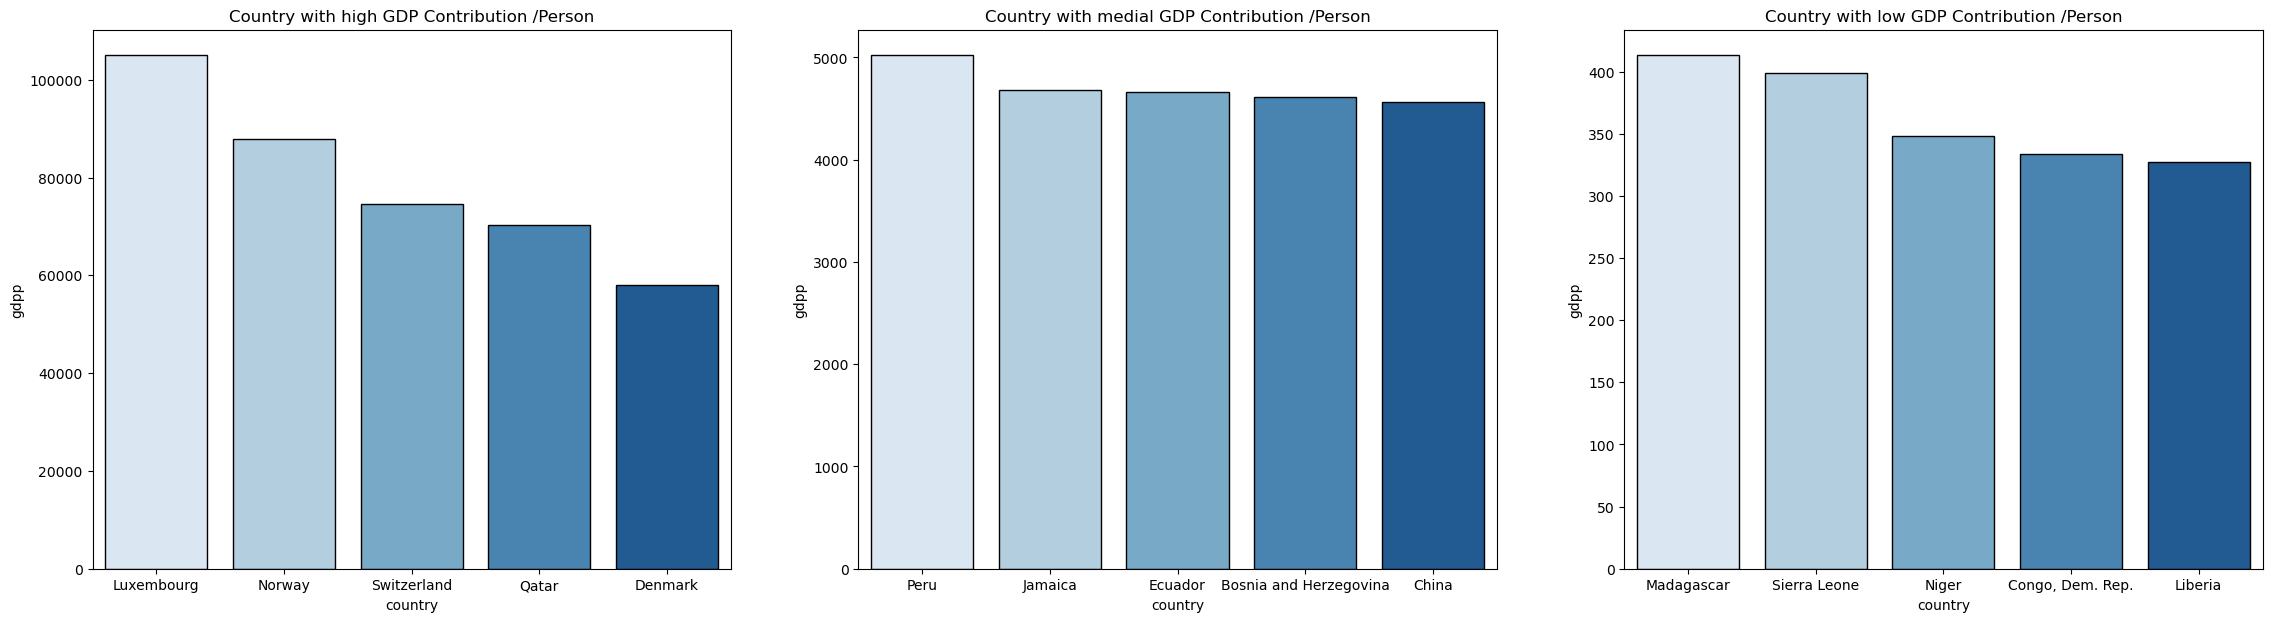

In [64]:
#|gdpp: GDP bình quân đầu người. Được tính bằng Tổng GDP chia cho tổng dân số 
fig, ax= plt.subplots(1,3,figsize = (28,7))
plt.subplot(1,3,1)
sns.barplot(data = data.sort_values(ascending = False, by = 'gdpp').iloc[:5],
            x = 'country', y = 'gdpp', palette = colors, edgecolor = 'black', ax = ax[0])
plt.title('Country with high GDP Contribution /Person')
plt.subplot(1,3,2)
sns.barplot(data = data.sort_values(ascending = False, by = 'gdpp').iloc[81:86],
            x = 'country', y = 'gdpp', palette = colors, edgecolor = 'black', ax = ax[1])
plt.title('Country with medial GDP Contribution /Person')
plt.subplot(1,3,3)
sns.barplot(data = data.sort_values(ascending = False, by = 'gdpp').iloc[161:166],
            x = 'country', y = 'gdpp', palette = colors, edgecolor = 'black', ax = ax[2])
plt.title('Country with low GDP Contribution /Person')

- Đây là một tính năng khó khăn vì dân số của quốc gia là một yếu tố quan trọng. Một ví dụ rõ ràng về điều này là Trung Quốc. Nước này có dân số đông cùng với GDP khổng lồ.
- Luxembourg một lần nữa có mặt trong các bảng xếp hạng hàng đầu. 
- Thụy Sĩ và Qatar có mặt trong top 5 tương tự về thu nhập.
- Nhóm cuối cùng một lần nữa bị chi phối bởi các quốc gia châu Phi, những quốc gia này được coi là lạc hậu về kinh tế.

**outliner**

In [65]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


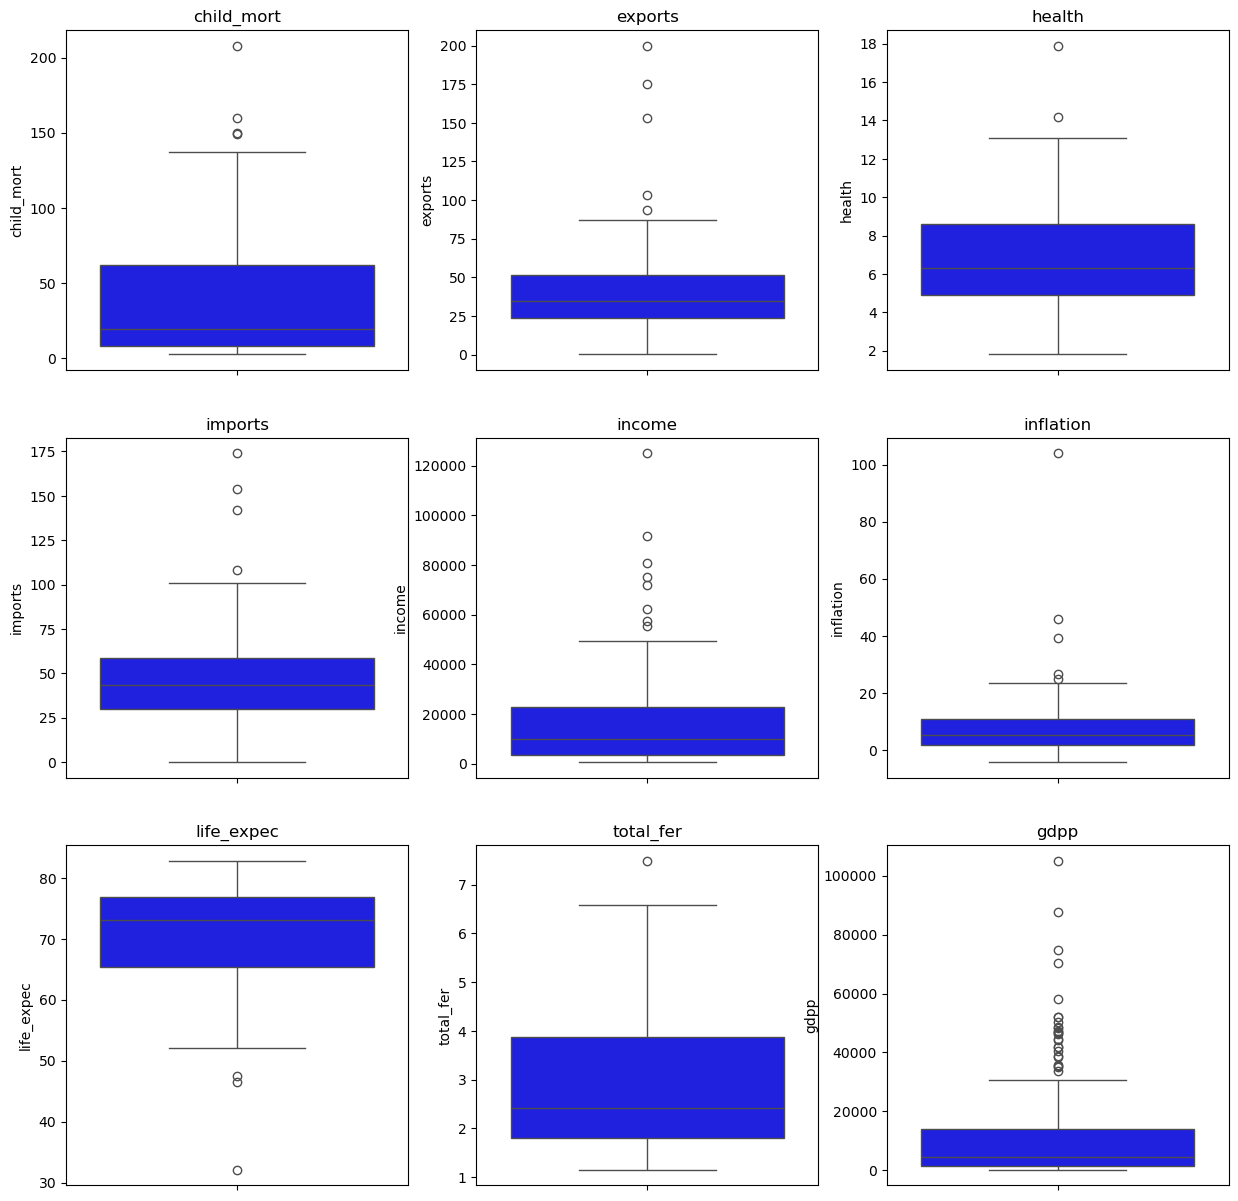

In [67]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
colors = ['blue']
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

In [70]:
df = data.drop('country', axis = 1)

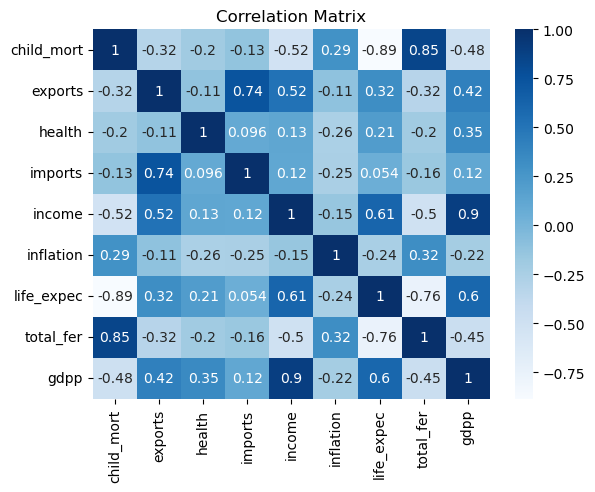

In [72]:
#heatmap
sns.heatmap(data = df.corr(), cmap = "Blues", annot = True)
plt.title('Correlation Matrix')
plt.show()